# CHURN SYSTEM 

# Step 1

# Importing Libraries

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.tree         import ExtraTreeClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Importing Data

In [123]:
#Historical Purchase Data
siparis=pd.read_csv('Siparis.csv')

#Google Analytics Data
GoogleAnalytics=pd.read_csv('churn.csv')

#Test Data (Next 2 Weeks orders data from getting historical data date)
Test=pd.read_csv('Siparis_Test.csv')

#Merging data.
dataset=pd.merge(siparis,GoogleAnalytics,on='MusteriRef',how='inner')

dataset.head()

,MusteriRef,adi,Soyadi,MusteriKayıtYasi,Musteri_Sehir,TekrarOrani,KampanyalıSiparisOrani,1.Sıra,1.adet,1.Oran,...,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
0,1665537,merve,bacaksızoğlu,1005,Tanımsız,0.000,0.0,CK1__Takım,2,0.250000,...,38.215000,10,141,15.100000,51,438.450980,11.254902,95,22,2
1,1666573,Nagihan,Ünal,1005,Tanımsız,0.125,0.0,BU8__Pantolon,5,0.147059,...,63.313333,23,-9,0.441165,25,1021.160000,18.320000,100,33,11
2,1669414,Esra,Şeker,1003,Tanımsız,0.000,0.0,BU8__Bermuda,1,0.125000,...,41.070000,38,-21,0.437427,46,330.500000,15.543478,155,23,2
3,1670568,rukiye,uğur,1003,KARAMAN,0.000,0.0,BU8__T-Shirt,9,0.529412,...,92.755000,27,65,3.407407,45,441.844444,13.222222,120,34,1
4,1673125,NaN,NaN,1001,Tanımsız,0.000,0.0,CU1__Gömlek,1,0.333333,...,19.530000,29,41,2.413793,28,358.928571,10.392857,73,9,11


# Data Discovering

### Let's have a quick look at columns

In [124]:
dataset.columns

Index(['MusteriRef', 'adi', 'Soyadi', 'MusteriKayıtYasi', 'Musteri_Sehir',
       'TekrarOrani', 'KampanyalıSiparisOrani', '1.Sıra', '1.adet', '1.Oran',
       '2.Sıra', '2.adet', '2.Oran', '3.Sıra', '3.adet', '3.Oran',
       'SonSiparisTarihiFarki', 'OrtalamaSiparişTarihiFarki',
       'IlkSiparisTarihiFarki', 'SiparisSayisi', 'SatisAdet',
       'IskontoluKDVli_Tutar_TL', 'IskontoluKDVsiz_Tutar_TL', 'Iskonto_tutar',
       'Kampanya İndirim Tutarı', 'Maliyet_Fiyati', 'BrutKar_TL',
       'Onaylanma-Teslim Edilme süresi', 'Recency_Score', 'Frequency_Score',
       'Monetary_Score', 'RFM Score', 'CLV_Degeri', 'IadeOran',
       'Ortalama_Sepet_Miktari', 'Ortalama_Sepet_Tutari', 'Ortalama_Maliyet',
       'Alisveris_Frekansi_Gun', 'Alisveris_Frekansi_Gun_Sapmasi',
       'Alisververis_Frekansi_Sapmasi_Carpani', 'Sessions',
       'Avg. Session Duration', 'Pages / Session', 'Product Detail Views',
       'Product Adds To Cart', 'Organic Searches'],
      dtype='object')

In [125]:
dataset.describe()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,1.adet,1.Oran,2.adet,2.Oran,3.adet,3.Oran,...,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
count,1.259770e+05,125977.000000,125730.000000,125977.000000,125977.000000,125977.000000,123429.000000,123429.000000,113513.000000,113513.000000,...,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000
mean,1.916537e+06,1120.222310,0.140914,0.089681,4.090858,0.294520,2.449019,0.174333,1.836406,0.124053,...,69.409263,39.583575,29.094501,6.215510,63.312319,616.259898,15.123448,198.025425,34.571287,3.610953
std,1.288576e+06,800.312526,0.184130,0.186198,4.337959,0.172255,2.233321,0.090201,1.591447,0.060982,...,45.237656,32.340255,63.737831,15.948962,120.252491,440.280967,10.809862,381.100374,58.793195,7.644434
min,1.100000e+02,7.000000,0.000000,0.000000,1.000000,0.027027,1.000000,0.008403,1.000000,0.005236,...,3.500000,1.000000,-163.000000,0.063218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.388680e+05,433.000000,0.000000,0.000000,2.000000,0.166667,1.000000,0.111111,1.000000,0.080000,...,44.415000,17.000000,-13.000000,0.535714,11.000000,371.200000,9.204082,34.000000,7.000000,0.000000
50%,1.770993e+06,955.000000,0.090909,0.000000,3.000000,0.250000,2.000000,0.153846,1.000000,0.111111,...,59.955000,31.000000,25.000000,1.798817,28.000000,522.884615,12.545455,89.000000,17.000000,1.000000
75%,3.166208e+06,1708.000000,0.222222,0.000000,5.000000,0.375000,3.000000,0.214286,2.000000,0.153846,...,81.905000,53.000000,77.000000,4.812500,65.000000,741.800000,17.785714,208.000000,39.000000,4.000000
max,4.091524e+06,2885.000000,1.000000,1.000000,462.000000,1.500000,82.000000,0.666667,79.000000,0.333333,...,2105.750000,174.000000,183.000000,184.000000,4467.000000,9408.000000,242.000000,19125.000000,3168.000000,222.000000


### Lets check if null values existing

In [126]:
#missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Soyadi,46155,0.366376
adi,45708,0.362828
3.Sıra,16859,0.133826
Onaylanma-Teslim Edilme süresi,16199,0.128587
3.Oran,12464,0.098939
3.adet,12464,0.098939
2.Sıra,7134,0.056629
1.Sıra,4182,0.033197
2.adet,2548,0.020226
2.Oran,2548,0.020226


### Lets take a look at heatmap to understand if there is a relationship between columns that have nulls

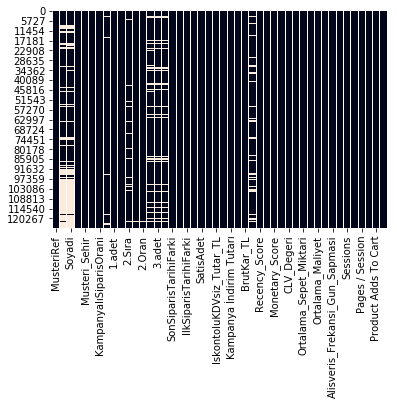

In [127]:
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

#### After have a conversation with business specialist, some of columns are not related with the subject of the project. Therefore We are going to drop some columns that doesn't mean anything to model,null columns and calculated columns

In [128]:
dataset=dataset.drop(['Onaylanma-Teslim Edilme süresi','1.Sıra','1.adet','1.Oran','2.Sıra','2.adet','2.Oran','3.Sıra','3.adet','3.Oran','adi','Soyadi','Musteri_Sehir','IskontoluKDVli_Tutar_TL','RFM Score'],axis=1)

#### Let's check agin and clean null values

In [129]:
#missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
TekrarOrani,247,0.001961
Kampanya İndirim Tutarı,14,0.000111
Organic Searches,0,0.000000
Recency_Score,0,0.000000
MusteriKayıtYasi,0,0.000000
KampanyalıSiparisOrani,0,0.000000
SonSiparisTarihiFarki,0,0.000000
OrtalamaSiparişTarihiFarki,0,0.000000
IlkSiparisTarihiFarki,0,0.000000
SiparisSayisi,0,0.000000


In [130]:
# Dropping rows that includes NaN valuables
dataset=dataset.dropna()

#missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Organic Searches,0,0.0
Recency_Score,0,0.0
MusteriKayıtYasi,0,0.0
TekrarOrani,0,0.0
KampanyalıSiparisOrani,0,0.0
SonSiparisTarihiFarki,0,0.0
OrtalamaSiparişTarihiFarki,0,0.0
IlkSiparisTarihiFarki,0,0.0
SiparisSayisi,0,0.0
SatisAdet,0,0.0


## Searching for relations between metrics

In [131]:
corr = dataset.corr()
corr.style.background_gradient()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,SonSiparisTarihiFarki,OrtalamaSiparişTarihiFarki,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,Maliyet_Fiyati,BrutKar_TL,Recency_Score,Frequency_Score,Monetary_Score,CLV_Degeri,IadeOran,Ortalama_Sepet_Miktari,Ortalama_Sepet_Tutari,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
MusteriRef,1,-0.968212,-0.00168638,0.0645531,0.0696108,-0.036845,-0.157628,-0.0893246,-0.0860484,-0.0742543,0.0183789,0.0102215,-0.0769415,-0.0651648,-0.0839021,-0.260859,-0.0680091,0.220221,-0.106429,-0.0542884,-0.0393424,-0.0442743,-0.0486576,0.0729002,0.0716216,-0.0985604,-0.00783152,-0.0230918,-0.109009,-0.115585,-0.100624
MusteriKayıtYasi,-0.968212,1,0.00207147,-0.0516645,-0.0683088,0.0276742,0.137022,0.0836964,0.0801706,0.0705055,-0.0197293,-0.0126327,0.0734377,0.0610282,0.0815026,0.238567,0.0684603,-0.196613,0.107851,0.0497674,0.0385424,0.0441803,0.0386861,-0.0669423,-0.0636726,0.0958438,0.0105,0.0242686,0.106833,0.110313,0.0999877
TekrarOrani,-0.00168638,0.00207147,1,-0.031068,0.173594,0.215666,0.150142,0.251961,0.230561,0.230292,0.0451345,0.0379462,0.228754,0.223754,-0.133849,0.2035,0.0667921,0.0711565,0.0822588,0.0478731,0.0635383,0.0594617,-0.328206,0.286681,0.151641,0.0933997,-0.00927433,-0.00321141,0.109739,0.127838,0.0689674
KampanyalıSiparisOrani,0.0645531,-0.0516645,-0.031068,1,0.0253996,0.0221327,0.00437771,-0.0208818,0.0473751,0.0299754,0.182916,0.103616,0.0317428,0.0245034,-0.0338563,-0.0460851,0.120749,0.060927,-0.00868889,0.140482,0.100884,0.108831,0.0137893,0.0106067,0.00611972,-0.0011998,0.021073,0.00574272,-0.00100448,-0.000158145,-0.00382555
SonSiparisTarihiFarki,0.0696108,-0.0683088,0.173594,0.0253996,1,0.798226,0.304514,-0.251886,-0.193163,-0.191182,-0.0418544,-0.0289587,-0.197473,-0.173857,-0.855061,-0.251214,-0.0376129,-0.0839535,-0.00695203,-0.0050816,-0.0191533,-0.0364697,-0.374181,0.882567,0.434449,-0.151774,-0.0117049,-0.0208533,-0.163901,-0.18065,-0.122855
OrtalamaSiparişTarihiFarki,-0.036845,0.0276742,0.215666,0.0221327,0.798226,1,0.705965,-0.031007,-0.0206164,-0.0249575,-0.0201404,-0.0163411,-0.0364747,-0.00801442,-0.673153,0.0177124,-0.00316177,-0.0864673,0.00811467,0.0162261,0.0026418,-0.0245798,-0.158983,0.633658,0.264984,-0.0471773,-0.0295511,-0.0400199,-0.0597289,-0.055011,-0.0462961
IlkSiparisTarihiFarki,-0.157628,0.137022,0.150142,0.00437771,0.304514,0.705965,1,0.224928,0.190635,0.177501,0.0178147,0.0109841,0.169287,0.181418,-0.247696,0.311456,0.0508922,-0.0684325,0.0238036,0.0564243,0.0424161,0.0207977,0.222261,0.0982913,-0.0303448,0.0919292,-0.0361466,-0.040267,0.0883768,0.117216,0.0621686
SiparisSayisi,-0.0893246,0.0836964,0.251961,-0.0208818,-0.251886,-0.031007,0.224928,1,0.770409,0.764067,0.110114,0.0630477,0.780441,0.70991,0.225215,0.556631,0.0848168,0.22935,0.0738523,0.0230021,0.0394892,0.0446974,-0.233762,-0.0559978,-0.0804964,0.351121,-0.0245714,-0.0302443,0.366089,0.469348,0.243541
SatisAdet,-0.0860484,0.0801706,0.230561,0.0473751,-0.193163,-0.0206164,0.190635,0.770409,1,0.956905,0.243385,0.21434,0.962144,0.917976,0.174157,0.447941,0.396963,0.318961,0.0680021,0.494502,0.462456,0.467699,-0.170654,-0.0473082,-0.0599699,0.290192,0.0438854,0.0407079,0.333976,0.522049,0.196447
IskontoluKDVsiz_Tutar_TL,-0.0742543,0.0705055,0.230292,0.0299754,-0.191182,-0.0249575,0.177501,0.764067,0.956905,1,0.266793,0.234053,0.990952,0.979252,0.170833,0.431183,0.419954,0.355741,0.0855703,0.433435,0.509632,0.50438,-0.169359,-0.0465921,-0.0548291,0.274996,0.0354259,0.0289072,0.32086,0.485612,0.191056


## Summary of Correlation Analysis


- There is a weak positive relationship between "First Purchase Date" and "Avg. Purchasing Freq.". That means some of our old costumers has better frequency.
- Some of costumers who came to site with organic search purchase more. But this is also a weak relation

### We should drop columns that have same meanings

In [132]:
dataset=dataset.drop(['SonSiparisTarihiFarki','OrtalamaSiparişTarihiFarki','Recency_Score','Frequency_Score','Monetary_Score'],axis=1)

# Okay now let's look at distrubitons of main metrics

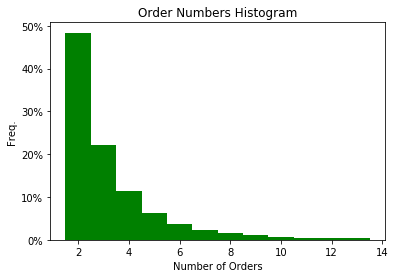

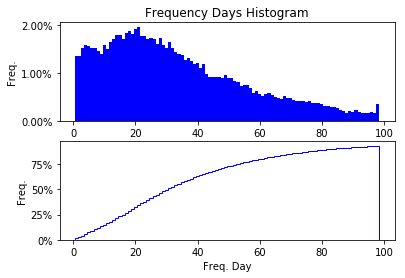

In [133]:
## Number of Orders Histogram
SiparisSayisi = dataset['SiparisSayisi'].values
plt.hist(SiparisSayisi, bins=np.arange(SiparisSayisi.min(), 15),color='g',align='left',weights=np.ones(len(SiparisSayisi)) / len(SiparisSayisi))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Order Numbers Histogram")
plt.xlabel("Number of Orders")
plt.ylabel("Freq.")
plt.show()

## Order Frequency
plt.subplot(211)
Frequency_Day = dataset['Alisveris_Frekansi_Gun'].values
plt.hist(Frequency_Day, bins=np.arange(Frequency_Day.min(), 100),color='b',align='left',weights=np.ones(len(Frequency_Day)) / len(Frequency_Day))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Frequency Days Histogram")
plt.xlabel("Freq. Day")
plt.ylabel("Freq.")

## Order Frequency Cumulative
plt.subplot(212)
Frequency_Day = dataset['Alisveris_Frekansi_Gun'].values
plt.hist(Frequency_Day, bins=np.arange(Frequency_Day.min(), 100),color='b',align='left',weights=np.ones(len(Frequency_Day)) / len(Frequency_Day),cumulative=True,histtype ='step')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Freq. Day")
plt.ylabel("Freq.")
plt.show()


## Summary of Histograms


- The costumers who ordered in last 6 months are our costumers for 3 years. 
- !! %70 of our customers order only 2-3 times in 6 months. !! That means most of our costumers leave the company after few order.
- %60 of our customers order with 40 days and less frequency

#### !!! After that analysis we should try more to hold costumers because of gaining new customer is more expensive then holding cost. Therefore, Let's make a Churn Prediction Project. !!!

# CHURN MODEL

   #### Here will be 3 steps. First part is data pre-processing. Secondly, we are going to cluster our costumers to label them as churn. After that, we are going to apply a neural network algorithm to get a churn rate for each costumer. 

## 1. Data Pre-Processing

### Checking Outliers

In [134]:
#Creating boxplot of Sales
dataset["SiparisSayisi"].describe()

count    125716.000000
mean          3.491505
std           3.296652
min           2.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         179.000000
Name: SiparisSayisi, dtype: float64

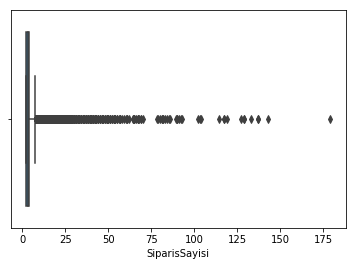

In [136]:
sns.boxplot(x=dataset["SiparisSayisi"])

plt.show()

In [137]:
# Outliers limit
Q1=2
Q3=4
IQR=Q3-Q1
TopLimit=Q3+1.5*IQR
print (TopLimit)

# Top limit for outliers is 7 but picking 10 for outliers
outliers=dataset[dataset["SiparisSayisi"]>10]
outliers.describe() # Showing outliers

7.0


,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,...,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
count,2.934000e+03,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,...,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000
mean,1.526316e+06,1358.239605,0.343715,0.081838,171.551466,17.276074,93.144172,2817.182451,44.512986,651.083371,...,77.699500,10.865031,16.485003,3.122538,279.244717,569.006010,13.748486,921.647580,160.730402,13.377982
std,1.173484e+06,794.587512,0.111829,0.129139,17.765431,12.489428,91.836411,2824.023116,255.055074,5428.775098,...,45.132247,3.714154,22.425258,5.504332,359.432927,301.047055,7.671565,1256.329151,189.367227,21.277218
min,1.380000e+02,30.000000,0.000000,0.000000,30.000000,11.000000,13.000000,348.040000,0.000000,0.000000,...,11.969444,1.000000,-13.000000,0.398519,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.028620e+05,674.250000,0.266667,0.000000,168.000000,12.000000,50.000000,1490.177500,0.000000,0.000000,...,53.006538,8.000000,3.000000,0.810686,67.000000,411.297540,9.718392,222.000000,54.000000,1.000000
50%,1.273252e+06,1272.000000,0.342105,0.062500,177.000000,14.000000,69.000000,2023.930000,4.980000,20.000000,...,67.135151,11.000000,9.000000,1.662919,166.500000,527.897117,12.311713,532.000000,112.000000,5.000000
75%,2.470984e+06,2049.750000,0.413793,0.100000,182.000000,17.000000,101.000000,3038.122500,22.950000,146.655000,...,88.301111,14.000000,19.000000,3.275965,342.750000,677.637121,16.008683,1151.000000,204.000000,16.000000
max,4.045872e+06,2885.000000,1.000000,1.000000,185.000000,179.000000,1385.000000,36197.150000,4910.000000,129326.000000,...,606.865789,28.000000,130.000000,131.000000,3507.000000,3927.000000,144.500000,17662.000000,3168.000000,222.000000


#### Costumers have 3.5 mean of order count in last 6 month. If we look the customers who ordered 50 and more times ,we can see that a customer order every 2 days. It doesn't make sense and we are going to drop that 2934 customers from dataset.

In [138]:
#dropping outliers

dataset = dataset.drop(dataset[dataset["SiparisSayisi"]>10].index)
dataset.describe()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,...,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
count,1.227820e+05,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,...,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000,122782.000000
mean,1.924492e+06,1115.277809,0.136044,0.090015,140.573830,3.162108,16.032024,469.397403,5.599357,66.482140,...,69.285433,40.251625,29.438867,6.287529,58.232062,617.630457,15.162085,181.030518,31.611955,3.381090
std,1.289349e+06,799.513278,0.182758,0.187449,37.693523,1.659004,14.716262,438.852413,52.214344,1188.839984,...,45.202307,32.388213,64.376713,16.109980,102.984537,443.161652,10.874251,313.776071,47.948230,6.839868
min,1.100000e+02,7.000000,0.000000,0.000000,12.000000,2.000000,2.000000,21.640000,0.000000,0.000000,...,3.500000,1.000000,-163.000000,0.063218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.472598e+05,424.000000,0.000000,0.000000,121.000000,2.000000,7.000000,221.012500,0.000000,0.000000,...,44.320000,17.000000,-14.000000,0.531250,11.000000,370.524905,9.200000,34.000000,7.000000,0.000000
50%,1.784298e+06,950.000000,0.083333,0.000000,150.000000,3.000000,12.000000,344.560000,0.000000,0.000000,...,59.795000,32.000000,26.000000,1.804348,27.000000,522.907132,12.558824,87.000000,17.000000,1.000000
75%,3.178116e+06,1696.000000,0.214286,0.000000,171.000000,4.000000,20.000000,570.895000,0.000000,0.000000,...,81.795000,54.000000,78.000000,4.869565,62.000000,743.835173,17.846154,198.000000,37.000000,4.000000
max,4.091524e+06,2885.000000,1.000000,1.000000,185.000000,10.000000,600.000000,20630.420000,4498.000000,127716.000000,...,2105.750000,174.000000,183.000000,184.000000,4467.000000,9408.000000,242.000000,19125.000000,1750.000000,222.000000


## 2. Labeling Costumers as churn or not

#### We choosed 2 metrics to define customers as churned. It's business team's insgiht 

In [139]:
X = dataset[['MusteriRef','Alisveris_Frekansi_Gun','Alisververis_Frekansi_Sapmasi_Carpani']].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fs = sc.fit_transform(X[:,1:])

## 3. K-MEANS  

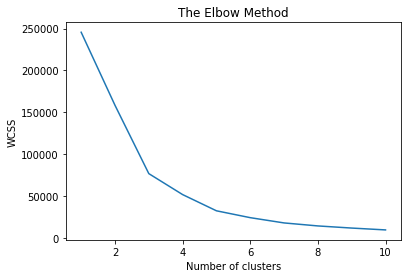

In [140]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_fs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
del i,wcss

#### We pick 3 clusters as optimum cluster number.

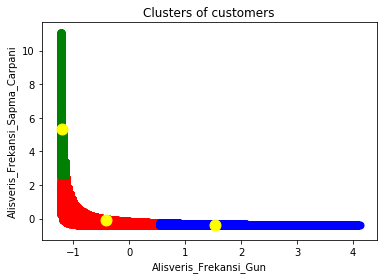

In [141]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_fs)


# Visualising the clusters

plt.scatter(X_fs[y_kmeans == 0, 0], X_fs[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_fs[y_kmeans == 1, 0], X_fs[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_fs[y_kmeans == 2, 0], X_fs[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 3], X[y_kmeans == 4, 4], s = 70, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 70, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Alisveris_Frekansi_Gun')
plt.ylabel('Alisveris_Frekansi_Sapma_Carpani')
#plt.legend()
plt.show()

In [142]:
#X ile Sınıfları birleştirme
y_kmeans=y_kmeans.reshape(len(y_kmeans),1)
birlesim=np.hstack((X, y_kmeans))
birlesim=pd.DataFrame(birlesim)
birlesim.columns=['MusteriRef','Alisveris_Frekansi_Gun','Alisveris_Frekansi_Gun_Sapmasi_Carpani','Cluster']
birlesim.head()

,MusteriRef,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi_Carpani,Cluster
0,1665537.0,10.0,15.100000,0.0
1,1666573.0,23.0,0.441165,0.0
2,1669414.0,38.0,0.437427,0.0
3,1670568.0,27.0,3.407407,0.0
4,1673125.0,29.0,2.413793,0.0


## Let's look at cluster

In [143]:
birlesim.groupby(['Cluster']).aggregate(['mean','count'])

MusteriRef        Alisveris_Frekansi_Gun         \
                 mean  count                   mean  count   
Cluster                                                      
0.0      1.927860e+06  92697              26.854763  92697   
1.0      1.877195e+06  27234              89.890762  27234   
2.0      2.266803e+06   2851               1.660470   2851   

        Alisveris_Frekansi_Gun_Sapmasi_Carpani         
                                          mean  count  
Cluster                                                
0.0                                   5.325293  92697  
1.0                                   0.572436  27234  
2.0                                  92.166608   2851

### As we can see, cluster-2 has the lowest frequency mean and the highest deviation. So we pick them as hihgly-churned and cluster-0 as the mid-churned group. 

In [144]:
Clustered_Group=birlesim[(birlesim.Cluster == 2) | (birlesim.Cluster == 0)]

#Labeling main data
Clustered_Group=Clustered_Group.drop(['Alisveris_Frekansi_Gun','Alisveris_Frekansi_Gun_Sapmasi_Carpani'],axis=1)
Clustered_Group['Cluster'] = Clustered_Group['Cluster'].apply({0:1, 2:1}.get)

dataset=pd.merge(dataset,Clustered_Group,on='MusteriRef',how='left')

In [145]:
dataset.fillna(0, inplace=True)
dataset.head()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,...,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches,Cluster
0,1665537,1005,0.000,0.0,161,2,8,178.91,0.0,0.0,...,10,141,15.100000,51,438.450980,11.254902,95,22,2,1.0
1,1666573,1005,0.125,0.0,133,6,34,855.10,0.0,0.0,...,23,-9,0.441165,25,1021.160000,18.320000,100,33,11,1.0
2,1669414,1003,0.000,0.0,94,3,8,214.38,0.0,0.0,...,38,-21,0.437427,46,330.500000,15.543478,155,23,2,1.0
3,1670568,1003,0.000,0.0,119,2,17,378.43,0.0,0.0,...,27,65,3.407407,45,441.844444,13.222222,120,34,1,1.0
4,1673125,1001,0.000,0.0,128,3,3,113.96,0.0,0.0,...,29,41,2.413793,28,358.928571,10.392857,73,9,11,1.0


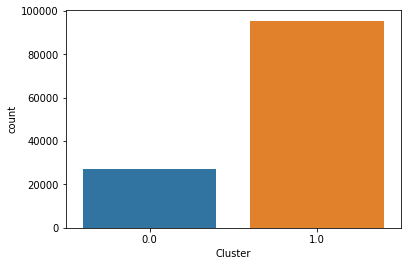

In [146]:
sns.countplot(x='Cluster', data=dataset)
plt.show()

### Now lets look at summary of Churn costumers and Non-Churn costumers

In [147]:

dataset.groupby(['Cluster']).aggregate({'MusteriRef':'count','Alisveris_Frekansi_Gun': 'mean','Alisveris_Frekansi_Gun_Sapmasi': 'mean','SiparisSayisi':'mean' , 'Sessions' :'mean','KampanyalıSiparisOrani':'mean','Ortalama_Sepet_Tutari':'mean'})

,MusteriRef,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,SiparisSayisi,Sessions,KampanyalıSiparisOrani,Ortalama_Sepet_Tutari
Cluster,,,,,,,
0.0,27234,89.890762,-43.953367,2.233421,40.084013,0.096992,146.970864
1.0,95548,26.103006,50.357820,3.426812,63.404791,0.088026,145.815692


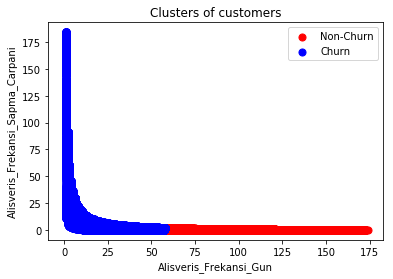

In [148]:
# Visualising the clusters
NonChurn=dataset['Cluster'] == 0
Churn=dataset['Cluster'] == 1
NonChurn=dataset[NonChurn]
Churn=dataset[Churn]

ChurnFreq=Churn['Alisveris_Frekansi_Gun'].values
NonChurnFreq=NonChurn['Alisveris_Frekansi_Gun'].values

ChurnDevi=Churn['Alisververis_Frekansi_Sapmasi_Carpani'].values
NonChurnDevi=NonChurn['Alisververis_Frekansi_Sapmasi_Carpani'].values


plt.scatter(NonChurnFreq, NonChurnDevi, s = 50, c = 'red', label = 'Non-Churn')
plt.scatter(ChurnFreq,ChurnDevi, s = 50, c = 'blue', label = 'Churn')
plt.title('Clusters of customers')
plt.xlabel('Alisveris_Frekansi_Gun')
plt.ylabel('Alisveris_Frekansi_Sapma_Carpani')
plt.legend()
plt.show()


# Step 2

# CUSTOMER RETURN CLUSTERING

#### As the second part, we will pick churn customers and cluster them according to activities.

### 1) K-MEANS

In [149]:
# Picking Churned Customers

X=dataset[(dataset.Cluster==1)]
X=X[['MusteriRef','Sessions','Product Adds To Cart']].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fs = sc.fit_transform(X[:,1:3])

C:\Users\tolga.ay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


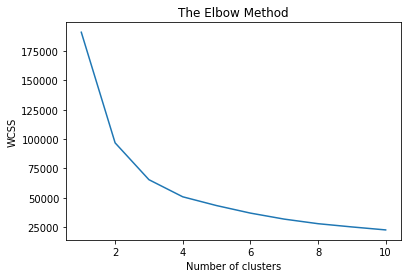

In [150]:

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_fs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
del i,wcss

In [151]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_fs)


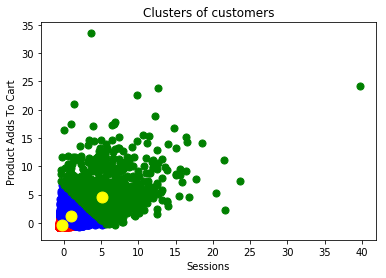

In [152]:
# Visualising the clusters
"""plt.scatter(X[:,2],X[:,3],c=y_kmeans)"""

plt.scatter(X_fs[y_kmeans == 0, 0], X_fs[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_fs[y_kmeans == 1, 0], X_fs[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_fs[y_kmeans == 2, 0], X_fs[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X_fs[y_kmeans == 3, 0], X_fs[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 70, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 70, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Sessions')
plt.ylabel('Product Adds To Cart')
#plt.legend()
plt.show()


In [153]:
# Merging clusters and data

y_kmeans=y_kmeans.reshape(len(y_kmeans),1)
birlesim=np.hstack((X, y_kmeans))
birlesim=pd.DataFrame(birlesim)
birlesim.columns=['MusteriRef','Sessions','Product Adds To Cart','Cluster']


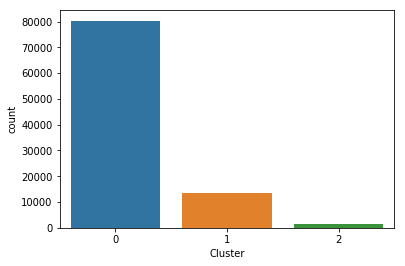

In [154]:
sns.countplot(x='Cluster', data=birlesim)
plt.show()

#### We will call clusters as 0='Low',1='Mid' and 2='High' potential to return

In [155]:
birlesim.groupby(['Cluster']).aggregate({'MusteriRef':'count','Sessions': 'mean','Product Adds To Cart': 'mean'})

,MusteriRef,Sessions,Product Adds To Cart
Cluster,,,
0,80336,32.216914,18.940251
1,13583,179.509608,96.715453
2,1629,633.360344,267.299570


In [156]:
Sonuc=pd.merge(birlesim,Test,on='MusteriRef',how='left')
Sonuc.fillna(0, inplace=True)
Sonuc.describe()

,MusteriRef,Sessions,Product Adds To Cart,Cluster,SiparisSayısı
count,9.554800e+04,95548.000000,95548.000000,95548.000000,95548.000000
mean,1.937973e+06,63.404791,34.230973,0.176257,0.159804
std,1.298280e+06,110.825675,51.134942,0.423427,0.436478
min,1.160000e+02,0.000000,0.000000,0.000000,0.000000
25%,7.491838e+05,11.000000,7.000000,0.000000,0.000000
50%,1.799116e+06,29.000000,18.000000,0.000000,0.000000
75%,3.204769e+06,68.000000,41.000000,0.000000,0.000000
max,4.091524e+06,4467.000000,1750.000000,2.000000,7.000000


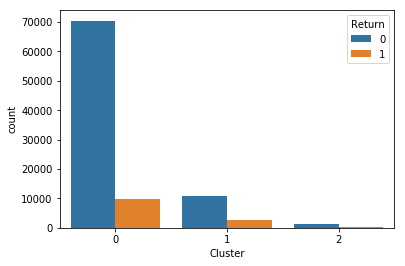

In [157]:
Sonuc['Return']=np.where(Sonuc['SiparisSayısı']>0, 1, 0)
sns.countplot(x="Cluster", hue='Return', data=Sonuc)
plt.show()

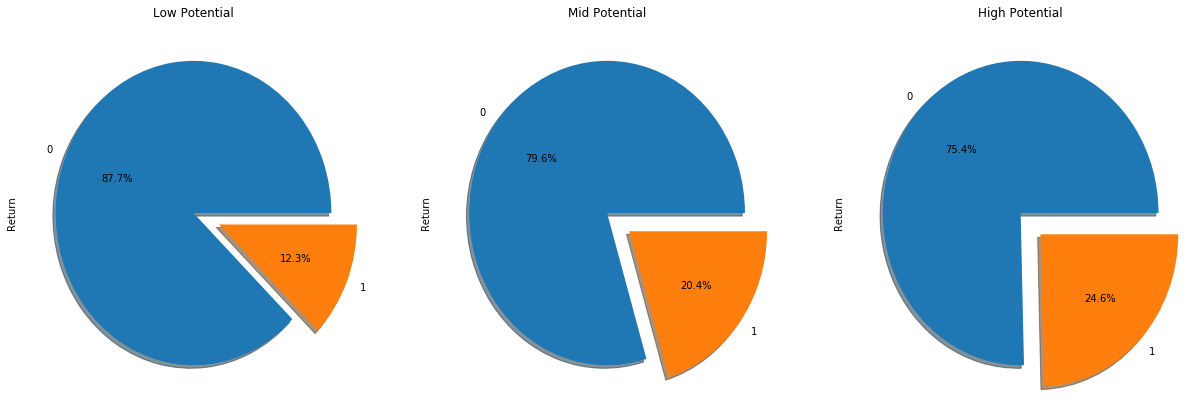

In [159]:
# Pie Charts of Return Potentials

f,ax=plt.subplots(1,3,figsize=(21,7))
Sonuc['Return'][Sonuc['Cluster']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
Sonuc['Return'][Sonuc['Cluster']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
Sonuc['Return'][Sonuc['Cluster']==2].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Low Potential')
ax[1].set_title('Mid Potential')
ax[2].set_title('High Potential')
plt.show()

# RESULT

### As a summary, we applied 2 clustering algorithms. First, clustered customers based on churn status, after that we clustered churned customers according to return potential. As we can see, %25 of our customers with  "High" return potential (400 of 1629 customers), %20 of customers with "Mid" return potential (3382 of 16583 customers) and %12 of customers with "Low" return potential ( 9881 of 80336 ) purchased in 2 weeks after we got data. 